In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pypt.load_data import get_data
from pypt.pmv import PMV



sns.set_theme(font="Times New Roman",font_scale=1)

# Punto 1
## selección de acciones

Se escogen 4 acciones de 5 sectores diferentes cada una, los sectores se escogen con base la situación coyuntara actual por ende se opta por 

 1. Sector energético 
 
 Las empresas que hacen parte del sector energético se espera que tengan un incremento de sus ganancias a causa de la reactivación completa de sus actividades; en especial, gracias al retorno progresivo a las actividades presenciales de empresas y trabajadores se espera que tanto la oferta de productos energéticos como su demanda se incremente.
 
 2. Sector industrial 
 
 Las empresas que hacen parte del sector Industrial durante 2020 y 2021 se vieron afectadas por las restricciónes de movilidad, la crisis de los contenedores y los costos de transporte incrementaron los costos de los insumos intermedios para la producción de bienes finales de las industria tecnológica y automóviles. 
 
 Se espera que con la demanda insatisfecha en materiales como el silicio, aluminio, germanio; usados en la fabricación de semiconductores, se incrementen las utilidades percibidas por las empresas parte de este sector.
 
 
 3. Sector Salud
 
 A pesar de la aparente disminución en los casos de covid-19, y el avance de los esquemas de vacunación de los diferentes países, se espera que la industria continue reportando ganancias hasta finales de 2022.
 
 4. Sector Real 
 
 Por su dinámica propia, por la reactivación econóica y por la industria de construcción y vivienda.
 
 5. Sector Tecnología
 
 A causa de la normalización en la cadena de suministro se espera que el sector tecnología continúe con su tendencia; no obstante, a causa del retorno a actividades presenciales puede preveerse una disminución en servicios tecnológicos como aplicaciones de reuniones virtuales y conferencias, sin embargo, se ha evidenciado un crecimiento de la demanda de servicios cloud computing, por tal razón empresas como Microsoft, Amazon y Google son relevantes debido a los productos en la nube.
 
 
Los emisores de cada acción se escogen de manera arbitraria, por facilidad en el ejercicio

In [130]:
symbols = [
    "AAPL",
    "MSFT",
    "AMZN",
    "GOOG",
    "XOM",
    "SNP",
    "EC",
    "TPL",
    "PFE",
    "NVS",
    "AZN",
    "JNJ",
    "PLD",
    "AMT",
    "KRG",
    "PSA",
    "BA",
    "CAT",
    "FDX",
    "DAL"  
]

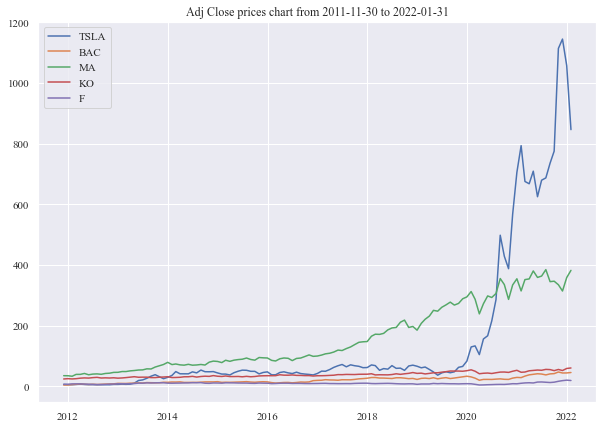

In [131]:
prices = get_data(symbols=['TSLA','BAC','MA','KO','F'],start_date="2011-11-30",end_date="2022-01-31",frequency='M').prices(plot={'draw':True,'standarise':False})

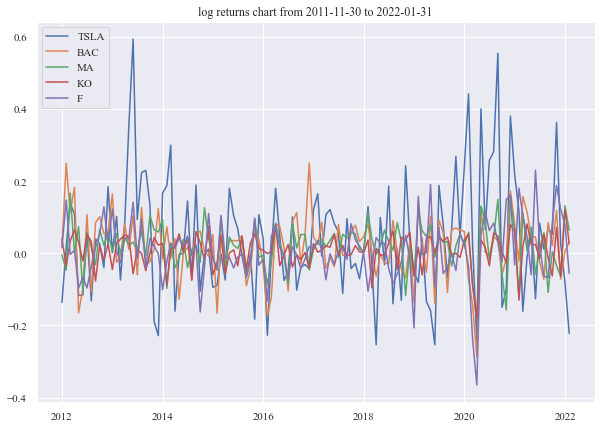

In [132]:
returns = get_data(symbols=['TSLA','BAC','MA','KO','F'],start_date="2011-11-30",end_date="2022-01-31",frequency='M').returns(return_type="log",plot=True)

In [133]:
# mask = np.ones_like(returns.corr())
# mask[np.tril_indices_from(mask)] = False

# fig = plt.figure(figsize=(15,10))
# sns.heatmap(round(returns.corr(),2), mask=mask, vmax=1,vmin=-1, square=True, annot=True, cmap="viridis")
# plt.title("Coeficiente de correlación de los retornos de los activos")
# plt.show()

In [134]:
#Continuar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pypt.load_data import get_data
from pypt.pmv import PMV



sns.set_theme(font="Times New Roman",font_scale=1)
retornos = returns
# retornos = pd.read_excel('./datasets/retornos.xlsx')

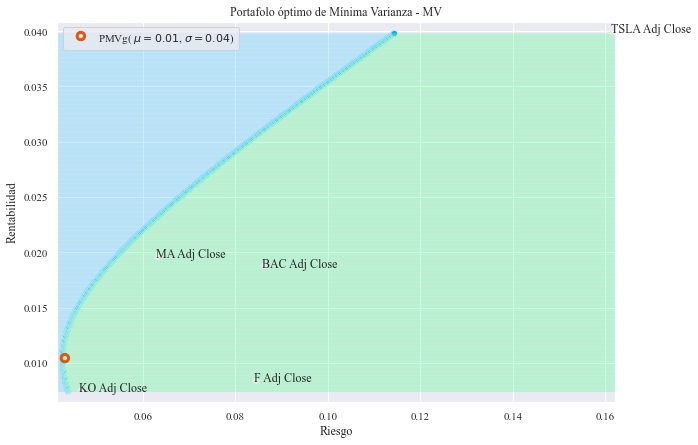

In [135]:
rpmv, sigmapmv ,wpmv  = PMV(returns=retornos).mv().pmv
PMV(returns=retornos).mv().plot(include_assets=True)

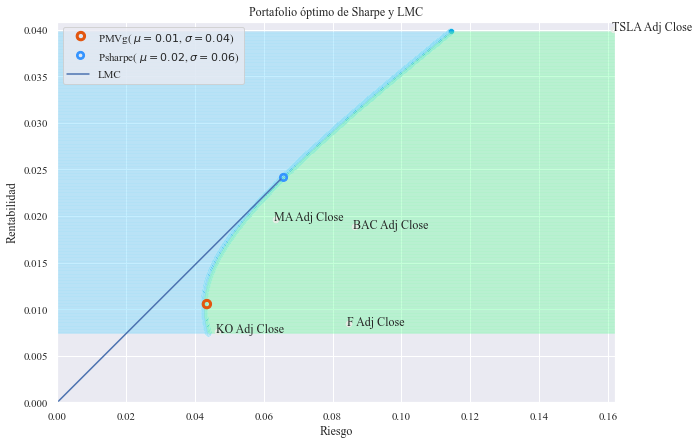

In [136]:
rsharpe, sigmasharpe ,wsharpe = PMV(returns=retornos).sharpe().psharpe
PMV(returns=retornos).sharpe().plot(lmc=True, include_assets=True)

# Cap 7 Advance mathematical portfolio anaylisis
## Formulating with concise Matriz notation

> Francis, J. Kim, D. (2013). ***Modern portfolio theory: Fundations, analysis and new developments***. Wiley. 



Sea 
\begin{align}
\sum_{i=1}^{n}w_{i}E(r_{i}) = E(r_{p})  \quad & \rightarrow \quad \boldsymbol{w'} \boldsymbol{E} = E(r_{p}) \quad (7.2a)\\
\sum_{i=1}^{n}w_{i} = 1\quad & \rightarrow \quad \boldsymbol{w'}1 = 1 \quad (2.11a) 
\end{align}

Dónde $\boldsymbol{w'} = (w_{1},w_{2},w_{3},...,w_{n})$ es el vector de ponderaciones de $n$ los n activos, $\boldsymbol{E'} = [E(r_{1}), E(r_{2}),...,E(r_{n})]$ es el vector de retornos esperados de los $n$ activos, y $1' = (1,1,...,1)$ es un vector de tamaño $n$ de unos. La función objetivo puede ser transformada de la siguiente manera

\begin{align}
\min_{\sigma_{i},\sigma_{j}} \quad \sigma_{p}^{2} = \sum_{i=1}^{n}\sum_{j=1}^{n}w_{i}w_{j}\sigma_{i,j} \quad \rightarrow \min_{\boldsymbol{w'},\boldsymbol{w}} \quad \sigma_{p}^{2} = \boldsymbol{w'}\Sigma    \boldsymbol{w} \quad(7.1a)
\end{align}

Dónde $\Sigma$ es la matriz $(n\times n)$ de varianzas y covarianzas.

El problema de optimización, usando notación matricial es
\begin{align}
\min \quad  L&=\frac{1}{2}\boldsymbol{w'}\Sigma \boldsymbol{w} \quad (7.1a) \\
\textrm{s.t.} \quad \boldsymbol{w'}\boldsymbol{E} &= E(r_{p}) \quad (7.2a)\\
                                \boldsymbol{w'}1&= 1 \quad (2.11a)
\end{align}

la constante $\frac{1}{2}$ multiplica la función objetivo solo por simplicidad computacional y de escritura

### Restricciones de igualdad
Como las restricciónes son igualdades, entonces planteamos el lagrangiano de la siguiente manera
\begin{align}
\min \quad L &= \frac{1}{2}\boldsymbol{w'}\Sigma\boldsymbol{w}+\lambda [E(r_{p}) - \boldsymbol{w'}\boldsymbol{E}] + \gamma(1-\boldsymbol{w'}1) \quad (7.3a)
\end{align}

Dponda $\lambda$ y $\gamma$ son los multiplicadores de Lagrange. Derivando parcialmente respecto a cada variable desconocida e igualando a 0 obtenemos las condiciones de primer orden 

\begin{align}
\frac{\partial L}{\partial \boldsymbol{w}} &= \Sigma \boldsymbol{w} - \lambda \boldsymbol{E} -\gamma 1 = 0 \quad (7.4a)\\
\\
\frac{\partial L}{\partial \lambda} &= E(r_{p}) - \boldsymbol{w'} \boldsymbol{E} = 0 \quad (7.4a)\\
\\
\frac{\partial L}{\partial \gamma} &=1- \boldsymbol{w'}1 = 0 \quad (7.4a)
\end{align}

Dónde $0$ es un vector de ceros de tamaño $n$. Sí la matriz de varianzas y covarianzas es definida positiva (convexa y monotónicamente creciente en todo su dominio) entonces las condiciones de primer orden son necesarias y sufcientes para un óptimo global. 

### Ponderaciones No negativas
#### Portafolio de mínima varianza global
Siempre que se tenga por retorno esperado el retorno del portafolio de mínima varianza global, entonces las ponderaciones serán siempre no negativas

Para resolver el ejercicio de optimización utilizamos la libraría ``cvxopt``

In [137]:
from cvxopt import matrix
from cvxopt import solvers

In [138]:
help(solvers.qp)

Help on function qp in module cvxopt.coneprog:

qp(P, q, G=None, h=None, A=None, b=None, solver=None, kktsolver=None, initvals=None, **kwargs)
    Solves a quadratic program
    
        minimize    (1/2)*x'*P*x + q'*x
        subject to  G*x <= h
                    A*x = b.
    
    
    Input arguments.
    
        P is a n x n dense or sparse 'd' matrix with the lower triangular
        part of P stored in the lower triangle.  Must be positive
        semidefinite.
    
        q is an n x 1 dense 'd' matrix.
    
        G is an m x n dense or sparse 'd' matrix.
    
        h is an m x 1 dense 'd' matrix.
    
        A is a p x n dense or sparse 'd' matrix.
    
        b is a p x 1 dense 'd' matrix or None.
    
        solver is None or 'mosek'.
    
        The default values for G, h, A and b are empty matrices with
        zero rows.
    
    
    Output arguments (default solver).
    
        Returns a dictionary with keys 'status', 'x', 's', 'y', 'z',
        'primal ob

In [139]:
vcov = np.matrix(retornos.cov())
mu =  np.array(retornos.agg(np.mean))

In [140]:
print(f"""
Matriz de varianzas y covarianzas
----------------------------------
{vcov}

Retorno esperado de los n activos
----------------------------------
{mu}

Portafolio de mínima varianza o retorno objetivo
----------------------------------
{rpmv}
""")


Matriz de varianzas y covarianzas
----------------------------------
[[0.02597423 0.0036409  0.00238872 0.00095314 0.00308484]
 [0.0036409  0.00736412 0.00202617 0.00087275 0.00371806]
 [0.00238872 0.00202617 0.00395226 0.00143623 0.0012044 ]
 [0.00095314 0.00087275 0.00143623 0.00213852 0.00089884]
 [0.00308484 0.00371806 0.0012044  0.00089884 0.0070623 ]]

Retorno esperado de los n activos
----------------------------------
[0.0398506  0.01866148 0.01951303 0.00743046 0.00828323]

Portafolio de mínima varianza o retorno objetivo
----------------------------------
[0.01029241]



In [141]:
def solvers_qp(vcov,mu,optimal_portfolio,inequality=False,):
    """
    Definimos la función solvers_qp que utiliza el solvers.qp del módulo cvxopt

    Optimiza un problema de la forma 

    min (1/2)x'Px + q'x
    s.a Gx <= h
        Ax = b

    Si adaptamos esta optimización a nuestro ejercicio de optimización del
    portafolio óptimo entonces tenemos que 
    
    Si inequality = False

        min L = (1/2)w'Pw
        s.a w'E = E(rp)
            w'1 = 1
    Si inequality = True

        min L = (1/2)w'Pw
        s.a w'E = E(rp)
            w'1 >= 0
    
    Es decir, podemos restringir la optimización para que la suma de las ponderaciones
    sea uno o bien, para que sea no negativa 

    Parámetros:
    -------------------------------------------------------------------

    vcov : Matriz (n x n) de varianzas y covarianzas


    mu : vector de tamaño (n,) de los retornos esperados de los n activos

    optimal_portfolio : Valor del retorno óptimo, este debe estar dentro de la frontera eficiente
                        puede ser el retorno del portafolio de mínima varianza global o el portafolio
                        óptimo de sharp

    inequality : bool -> False si w'1 = 1 o True si w'1 >= 0

    Ejemplo: 
    -------------------------------------------------------------------
    vcov : (5x5)

        [[0.02450049 0.00388752 0.00228452 0.00095474 0.00308689]
        [0.00388752 0.00874613 0.00182295 0.00094029 0.00445079]
        [0.00228452 0.00182295 0.00385652 0.00142886 0.00119709]
        [0.00095474 0.00094029 0.00142886 0.0021134  0.00087716]
        [0.00308689 0.00445079 0.00119709 0.00087716 0.00734027]]
    mu : (5,)
    
        [0.04029284 0.01008825 0.02163079 0.00754402 0.00529053]

    optimal_portfolio : rpmv

        [0.01000976]

    inequality : False

    [in] solv = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=rpt, inequality=True)
        print(solv)

    [out]
        [ 1.26e-02]
        [ 3.92e-02]
        [ 1.56e-01]
        [ 6.81e-01]
        [ 1.10e-01] 
    """
    n = len(mu)
    if inequality == False:
        P = matrix(vcov)
        q = matrix(np.zeros((n,1)))
        G = matrix(np.concatenate((
            -np.transpose(np.array(mu)).reshape((n,1)),
            -np.ones(n).reshape(n,1)),1).T)
        h = matrix(-np.array([optimal_portfolio,[1]]))
    elif inequality == True:
        P = matrix(vcov)
        q = matrix(np.zeros((n,1)))
        G = matrix(np.concatenate((
            -np.transpose(np.array(mu)).reshape((n,1)),
            -np.ones(n).reshape(n,1),
            -np.diag(np.full(n,1))),1).T)
        h = matrix(-np.concatenate((
            np.array([optimal_portfolio,[1]]),
            np.zeros(n).reshape(n,1)),0))

    response = np.array(solvers.qp(P=P,q=q,G=G,h=h,show_progress=False)['x']).reshape(-1)
    return response

     pcost       dcost       gap    pres   dres
 0:  9.0203e-04  9.0530e-04  2e-03  1e+00  3e-16
 1:  9.0446e-04  9.0530e-04  2e-05  1e-02  3e-18
 2:  9.0529e-04  9.0530e-04  2e-07  1e-04  1e-18
 3:  9.0530e-04  9.0530e-04  2e-09  1e-06  1e-18
 4:  9.0530e-04  9.0530e-04  2e-11  1e-08  9e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1861e-03 -6.1109e-01  9e+00  3e+00  5e+00
 1:  1.1296e-02 -1.3280e+00  2e+00  7e-01  1e+00
 2:  2.8156e-02 -1.0000e-01  1e-01  3e-02  5e-02
 3:  1.0992e-02 -6.6253e-03  2e-02  5e-16  1e-17
 4:  2.3272e-03 -1.1329e-04  2e-03  5e-16  2e-18
 5:  1.0255e-03  7.1149e-04  3e-04  3e-16  1e-18
 6:  9.2310e-04  8.7842e-04  4e-05  1e-16  2e-17
 7:  9.0747e-04  9.0240e-04  5e-06  1e-16  2e-17
 8:  9.0559e-04  9.0493e-04  7e-07  2e-16  2e-16
 9:  9.0534e-04  9.0525e-04  8e-08  2e-16  6e-16
Optimal solution found.


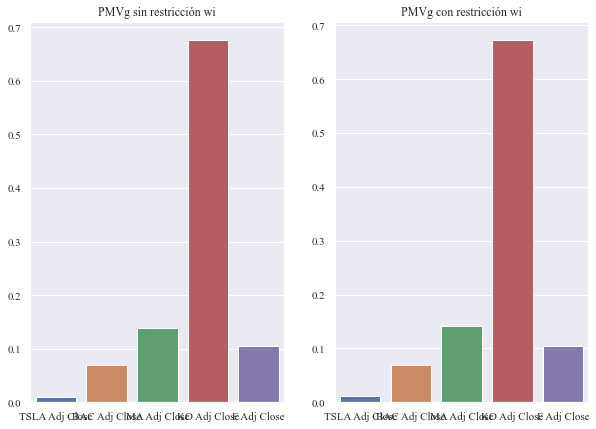

In [142]:
returns = retornos 
solv_nwi = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=rpmv, inequality=False)
solv_wi = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=rpmv, inequality=True)

fig, axes = plt.subplots(1,2,figsize=(10,7))
sns.barplot(ax=axes[0],x=returns.columns,y=solv_nwi)
axes[0].set_title('PMVg sin restricción wi')

sns.barplot(ax=axes[1],x=returns.columns,y=solv_wi)
axes[1].set_title('PMVg con restricción wi')
plt.show()

### Ponderaciones negativas

#### Portafolio óptimo de Sharpe

In [143]:
########################################################################
## Introducción del activo libre de riesgo
rf = 0 
er = mu - rf
zi = np.linalg.solve(vcov,er)

wpt = np.squeeze(np.asarray(zi / sum(zi))) # "portafolio óptimo de sharpe"

##### 
# Rentabilidad y riesgo del portafolio óptimo
rpt = np.asarray(wpt @ mu).reshape(-1)
sigmapt = np.asarray(np.sqrt(wpt @ vcov @ wpt)).reshape(-1)


In [144]:
print(f"""
Matriz de varianzas y covarianzas
----------------------------------
{vcov}

Retorno esperado de los n activos
----------------------------------
{mu}

Portafolio de mínima varianza o retorno objetivo
----------------------------------
{rpt}
""")


Matriz de varianzas y covarianzas
----------------------------------
[[0.02597423 0.0036409  0.00238872 0.00095314 0.00308484]
 [0.0036409  0.00736412 0.00202617 0.00087275 0.00371806]
 [0.00238872 0.00202617 0.00395226 0.00143623 0.0012044 ]
 [0.00095314 0.00087275 0.00143623 0.00213852 0.00089884]
 [0.00308484 0.00371806 0.0012044  0.00089884 0.0070623 ]]

Retorno esperado de los n activos
----------------------------------
[0.0398506  0.01866148 0.01951303 0.00743046 0.00828323]

Portafolio de mínima varianza o retorno objetivo
----------------------------------
[0.02394934]



     pcost       dcost       gap    pres   dres
 0:  9.0852e-04  1.0723e-03  1e-02  1e+00  3e-16
 1:  9.1228e-04  1.0763e-03  2e-04  3e-02  8e-18
 2:  9.5900e-04  1.3434e-03  2e-05  2e-02  4e-18
 3:  2.1500e-03  2.1063e-03  2e-04  1e-03  3e-17
 4:  2.1070e-03  2.1065e-03  2e-06  1e-05  8e-19
 5:  2.1065e-03  2.1065e-03  3e-08  2e-07  2e-18
 6:  2.1065e-03  2.1065e-03  8e-10  2e-09  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1878e-03 -5.9553e-01  9e+00  3e+00  5e+00
 1:  1.1308e-02 -1.3126e+00  2e+00  7e-01  1e+00
 2:  2.8492e-02 -9.4736e-02  1e-01  3e-02  5e-02
 3:  1.2771e-02 -4.5485e-03  2e-02  1e-15  7e-18
 4:  3.4932e-03  1.3399e-03  2e-03  3e-16  3e-18
 5:  2.2225e-03  2.0481e-03  2e-04  2e-16  6e-18
 6:  2.1454e-03  2.1271e-03  2e-05  1e-16  2e-17
 7:  2.1381e-03  2.1363e-03  2e-06  3e-16  3e-16
 8:  2.1379e-03  2.1378e-03  9e-08  3e-16  1e-15
Optimal solution found.


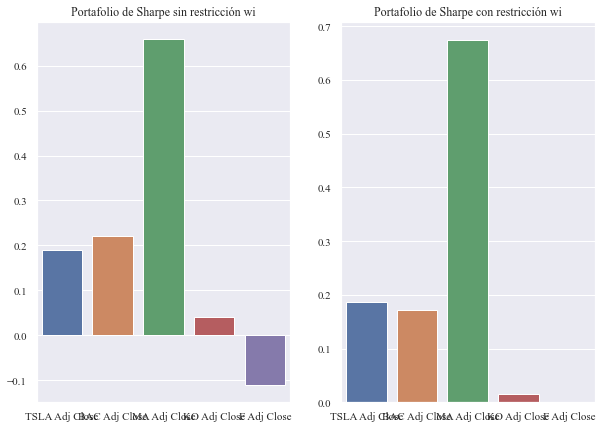

In [145]:
solv_nwi = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=rpt, inequality=False)
solv_wi = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=rpt, inequality=True)

fig, axes = plt.subplots(1,2,figsize=(10,7))
sns.barplot(ax=axes[0],x=returns.columns,y=solv_nwi)
axes[0].set_title('Portafolio de Sharpe sin restricción wi')

sns.barplot(ax=axes[1],x=returns.columns,y=solv_wi)
axes[1].set_title('Portafolio de Sharpe con restricción wi')
plt.show()

#### Portafolio objetivo arbitrario

     pcost       dcost       gap    pres   dres
 0:  9.0203e-04  9.0530e-04  2e-03  1e+00  3e-16
 1:  9.0446e-04  9.0530e-04  2e-05  1e-02  3e-18
 2:  9.0529e-04  9.0530e-04  2e-07  1e-04  1e-18
 3:  9.0530e-04  9.0530e-04  2e-09  1e-06  1e-18
 4:  9.0530e-04  9.0530e-04  2e-11  1e-08  9e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.0953e-04  1.0990e-03  2e-02  1e+00  5e-16
 1:  9.1357e-04  1.1040e-03  2e-04  3e-02  1e-17
 2:  9.7332e-04  1.4339e-03  2e-05  2e-02  6e-18
 3:  2.1612e-03  2.2927e-03  2e-04  3e-03  4e-17
 4:  2.3649e-03  2.2384e-03  1e-04  0e+00  1e-18
 5:  2.2993e-03  2.2853e-03  1e-05  2e-16  5e-18
 6:  2.2956e-03  2.2940e-03  2e-06  2e-16  4e-16
 7:  2.2954e-03  2.2954e-03  6e-08  2e-16  7e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.0852e-04  1.0723e-03  1e-02  1e+00  3e-16
 1:  9.1228e-04  1.0763e-03  2e-04  3e-02  8e-18
 2:  9.5900e-04  1.3434e-03  2e-05  2e-02  4e-18
 3:  2.1500e-03  2.1063e

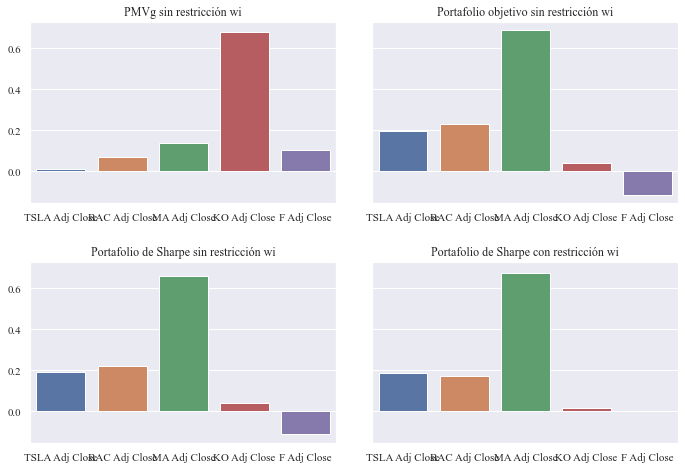

In [146]:
#### Resumen
solv_nwi_pmv = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=rpmv, inequality=False)
solv_wi_target = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=np.array([0.025]), inequality=False)
solv_nwi_ps = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=rpt, inequality=False)
solv_wi_ps = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=rpt, inequality=True)

fig, axes = plt.subplots(2,2,figsize=(10,7), sharey=True)
sns.barplot(ax=axes[0,0],x=returns.columns,y=solv_nwi_pmv)
axes[0,0].set_title('PMVg sin restricción wi')

sns.barplot(ax=axes[0,1],x=returns.columns,y=solv_wi_target)
axes[0,1].set_title('Portafolio objetivo sin restricción wi')

sns.barplot(ax=axes[1,0],x=returns.columns,y=solv_nwi_ps)
axes[1,0].set_title('Portafolio de Sharpe sin restricción wi')

sns.barplot(ax=axes[1,1],x=returns.columns,y=solv_wi_ps)
axes[1,1].set_title('Portafolio de Sharpe con restricción wi')
fig.tight_layout(pad=2.0)
plt.show()

# Desempeño de los portafolios
## Backtesting con datos al interior de la muestra

In [147]:
# rendimiendo de los portafolios con una inversión de USD $ 30 millones
capital = 30

In [171]:
# Retornos históricos del portafolio óptimo de sharpe
# Sin restricción
t = returns.shape[0]
op_nwi_ps = np.array(np.matrix(returns) @ solv_nwi_ps).reshape(-1)
port_sharpe1 = []
for i in range(t):
    if i == 0:
        port_sharpe1.append(capital)
    else:
        port_sharpe1.append(port_sharpe1[i-1]*np.exp(op_nwi_ps[i-1]))
# con restricción
t = returns.shape[0]
op_wi_ps = np.array(np.matrix(returns) @ solv_wi_ps).reshape(-1)
port_sharpe2 = []
for i in range(t):
    if i == 0:
        port_sharpe2.append(capital)
    else:
        port_sharpe2.append(port_sharpe2[i-1]*np.exp(op_wi_ps[i-1]))

#Retornos históricos del portafolio de mínima varianza global
t = returns.shape[0]
op_nwi_pmv = np.array(np.matrix(returns) @ solv_nwi_pmv).reshape(-1)
port_pmv = []
for i in range(i):
    if i == 0:
        port_pmv.append(capital)
    else:
        port_pmv.append(port_pmv[i-1]*np.exp(op_nwi_pmv[i-1]))

#Retornos históricos de mi portafolio objetivo
t = returns.shape[0]
op_wi_target = np.array(np.matrix(returns) @ solv_wi_target).reshape(-1)
port_target = []
for i in range(t):
    if i == 0:
        port_target.append(capital)
    else:
        port_target.append(port_target[i-1]*np.exp(op_wi_target[i-1]))


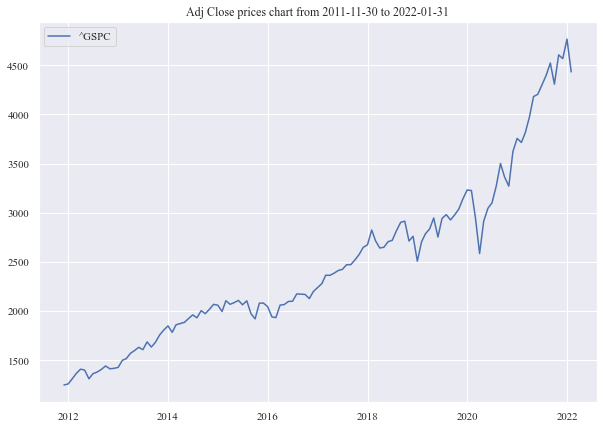

In [149]:
## rendimiento del S&P500
syp_500 = get_data(symbols=['^GSPC'],start_date="2011-11-30",end_date="2022-01-31",frequency='M').prices(plot={'draw':True,'standarise':False})

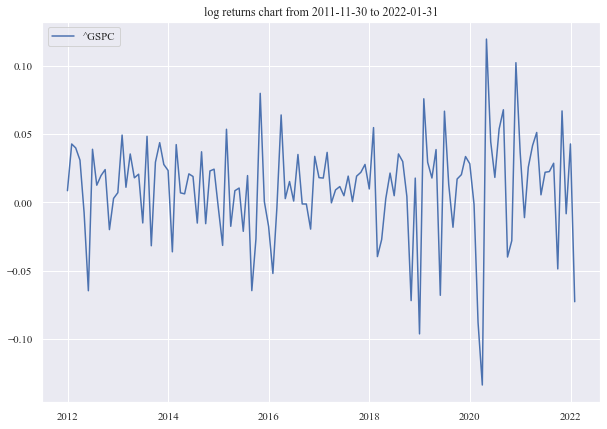

In [150]:
syp_500_returns = get_data(symbols=['^GSPC'],start_date="2011-11-30",end_date="2022-01-31",frequency='M').returns(plot=True,return_type='log')

In [151]:
port_indice = []
for i in range(t):
    if i == 0:
        port_indice.append(capital)
    else:
        port_indice.append(port_indice[i-1]*np.exp(syp_500_returns.iloc[0][0]))

In [177]:
len(port_sharpe2)

122

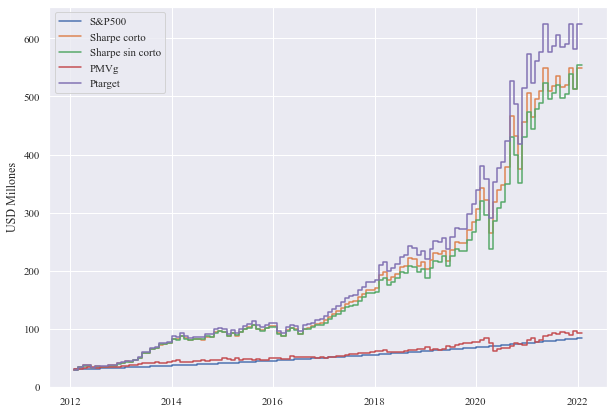

In [187]:

dates = syp_500.index[2:]
fig = plt.figure(figsize=(10,7))
sns.lineplot(x=dates,y=port_indice[1:],label='S&P500',drawstyle='steps-pre')
sns.lineplot(x=dates,y=port_sharpe1[1:],label='Sharpe corto',drawstyle='steps-pre')
sns.lineplot(x=dates,y=port_sharpe2[1:],label='Sharpe sin corto',drawstyle='steps-pre')
sns.lineplot(x=dates,y=port_pmv,label='PMVg',drawstyle='steps-pre')
sns.lineplot(x=dates,y=port_target[1:],label='Ptarget',drawstyle='steps-pre')
plt.ylabel('USD Millones')
plt.legend(loc='upper left')
plt.show()